In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from highlight_text import fig_text

In [2]:

df = pd.read_csv("data/epl_xg_21_22&22_23.csv")

In [3]:
df

,date,home_team_name,home_team_xG,away_team_xG,away_team_name
0,8/13/21,Brentford,1.6,1.6,Arsenal
1,8/14/21,Manchester Utd,2.5,0.6,Leeds United
2,8/14/21,Leicester City,0.7,1.5,Wolves
3,8/14/21,Burnley,1.4,1.4,Brighton
4,8/14/21,Chelsea,0.8,0.4,Crystal Palace
...,...,...,...,...,...
548,2/13/23,Liverpool,2.2,0.3,Everton
549,2/18/23,Newcastle Utd,2.0,2.4,Liverpool
550,2/25/23,Crystal Palace,0.9,0.6,Liverpool
551,3/1/23,Liverpool,2.5,0.8,Wolves


In [4]:
#df= df.dropna()

In [5]:
df.isnull().values.any()


False

In [6]:
home_df = df.copy()
home_df = home_df.melt(id_vars = ["date", "home_team_name", "away_team_name"])
home_df["venue"] = "H"
home_df.rename(columns = {"home_team_name":"team", "away_team_name":"opponent"}, inplace = True)
home_df.replace({"variable":{"home_team_xG":"xG_for", "away_team_xG":"xG_ag"}}, inplace = True)

In [7]:
away_df = df.copy()
away_df = away_df.melt(id_vars = ["date", "away_team_name", "home_team_name"])
away_df["venue"] = "A"
away_df.rename(columns = {"away_team_name":"team", "home_team_name":"opponent"}, inplace = True)
away_df.replace({"variable":{"away_team_xG":"xG_for", "home_team_xG":"xG_ag"}}, inplace = True)

In [8]:
df = pd.concat([home_df, away_df]).reset_index(drop = True)

In [9]:
# Filter Liverpool data
df = df[df["team"] == "Liverpool"].reset_index(drop = True)
df = df.sort_values(by = "date")


In [10]:

# xG conceded and xG created
Y_for = df[df["variable"] == "xG_for"].reset_index(drop = True)
Y_ag = df[df["variable"] == "xG_ag"].reset_index(drop = True)
X = pd.Series(range(len(Y_for)))

# Compute the rolling average (min_periods is used for the partial average)
# Here we're using a 10 game rolling average
Y_for = Y_for.rolling(window = 5, min_periods = 0).mean()
Y_ag = Y_ag.rolling(window = 5, min_periods = 0).mean()

/var/folders/vp/bmgsm3216fg61zdd22k8n6jw0000gn/T/ipykernel_393/2873895867.py:8: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date', 'opponent', 'team', 'variable', 'venue'], dtype='object')
  Y_for = Y_for.rolling(window = 5, min_periods = 0).mean()
/var/folders/vp/bmgsm3216fg61zdd22k8n6jw0000gn/T/ipykernel_393/2873895867.py:9: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date', 'opponent', 'team', 'variable', 'venue'], dtype='object')
  Y_ag = Y_ag.rolling(window = 5, min_periods = 0).mean()


In [11]:
df

,date,team,opponent,variable,value,venue
91,1/14/23,Liverpool,Brighton,xG_ag,1.9,A
122,1/14/23,Liverpool,Brighton,xG_for,1.0,A
41,1/16/22,Liverpool,Brentford,xG_ag,0.7,H
9,1/16/22,Liverpool,Brentford,xG_for,3.2,H
105,1/2/22,Liverpool,Chelsea,xG_for,1.7,A
...,...,...,...,...,...,...
2,9/18/21,Liverpool,Crystal Palace,xG_for,3.3,H
66,9/25/21,Liverpool,Brentford,xG_ag,2.2,A
97,9/25/21,Liverpool,Brentford,xG_for,2.6,A
116,9/3/22,Liverpool,Everton,xG_for,2.1,A


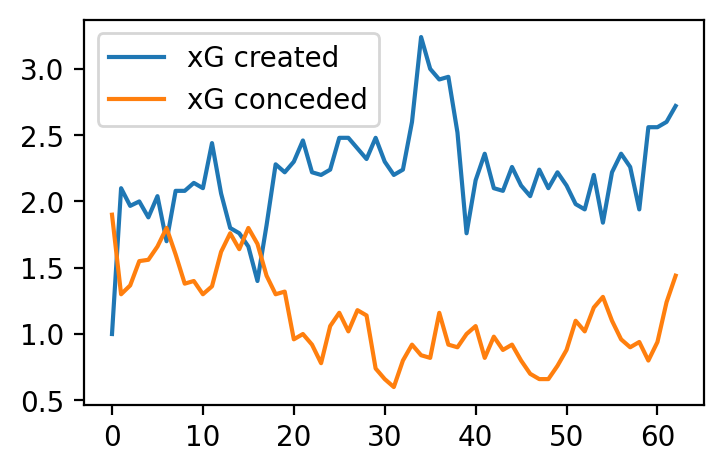

In [12]:
fig = plt.figure(figsize=(4, 2.5), dpi = 200)
ax = plt.subplot(111)

ax.plot(X, Y_for, label = "xG created")
ax.plot(X, Y_ag, label = "xG conceded")

ax.legend()

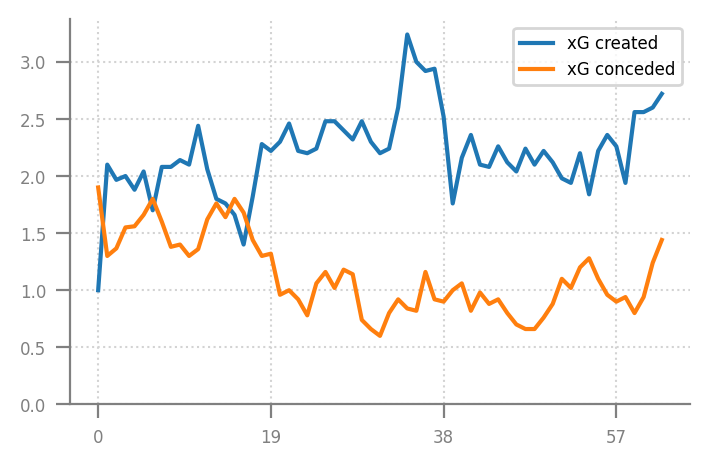

In [13]:
fig = plt.figure(figsize=(4, 2.5), dpi = 200)
ax = plt.subplot(111)

# Remove top & right spines and change the color.
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")

# Set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

ax.plot(X, Y_for, label = "xG created")
ax.plot(X, Y_ag, label = "xG conceded")

# Customize the ticks to match spine color and adjust label size.
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "grey"
)

# Set x-axis major tick positions to only 19 game multiples.
ax.xaxis.set_major_locator(ticker.MultipleLocator(19))
# Set y-axis major tick positions to only 0.5 xG multiples.
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_ylim(0)


ax.legend(fontsize = 6)

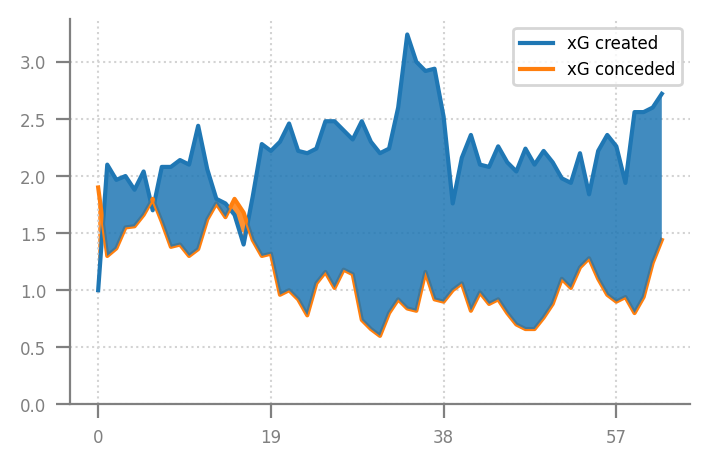

In [14]:
fig = plt.figure(figsize=(4, 2.5), dpi = 200)
ax = plt.subplot(111)

# Remove top & right spines and change the color.
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")

# Set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

ax.plot(X, Y_for, label = "xG created")
ax.plot(X, Y_ag, label = "xG conceded")

# Fill between
ax.fill_between(
    X, 
    Y_ag["value"],
    Y_for["value"], 
    where = Y_for["value"] > Y_ag["value"], 
    interpolate = True,
    alpha = 0.85,
    zorder = 3
)

ax.fill_between(
    X, 
    Y_ag["value"],
    Y_for["value"], 
    where = Y_ag["value"] >= Y_for["value"], 
    interpolate = True,
    alpha = 0.85
)

# Customize the ticks to match spine color and adjust label size.
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "grey",
    zorder = 3
)

# Set x-axis major tick positions to only 19 game multiples.
ax.xaxis.set_major_locator(ticker.MultipleLocator(19))
# Set y-axis major tick positions to only 0.5 xG multiples.
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_ylim(0)


ax.legend(fontsize = 6)

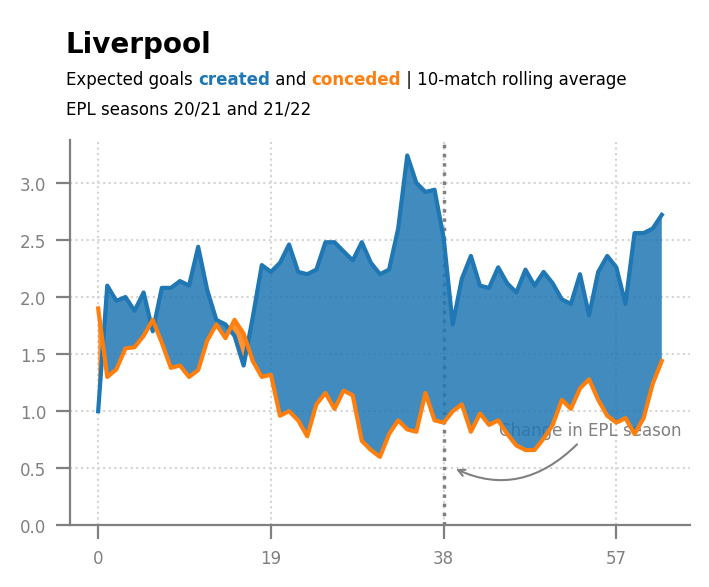

In [20]:
fig = plt.figure(figsize=(4, 2.5), dpi = 200)
ax = plt.subplot(111)

# Remove top & right spines and change the color.
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")

# Set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

line_1 = ax.plot(X, Y_for, zorder = 4)
line_2 = ax.plot(X, Y_ag, zorder = 4)

ax.set_ylim(0)
# Add a line to mark the division between seasons
ax.plot(
    [38,38], # 38 games per season
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    ls = ":",
    lw = 1.25,
    color = "grey",
    zorder = 2
)

# Annotation with data coordinates and offset points.
ax.annotate(
    xy = (38, .55),
    xytext = (20, 10),
    textcoords = "offset points",
    text = "Change in EPL season",
    size = 6,
    color = "grey",
    arrowprops=dict(
        arrowstyle="->", shrinkA=0, shrinkB=5, color="grey", linewidth=0.75,
        connectionstyle="angle3,angleA=50,angleB=-30"
    ) # Arrow to connect annotation
)

# Fill between
ax.fill_between(
    X, 
    Y_ag["value"],
    Y_for["value"], 
    where = Y_for["value"] >= Y_ag["value"], 
    interpolate = True,
    alpha = 0.85,
    zorder = 3
)

ax.fill_between(
    X, 
    Y_ag["value"],
    Y_for["value"], 
    where = Y_ag["value"] > Y_for["value"], 
    interpolate = True,
    alpha = 0.85,
    zorder = 3
)

# Customize the ticks to match spine color and adjust label size.
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "grey",
    zorder = 3
)

# Set x-axis major tick positions to only 19 game multiples.
ax.xaxis.set_major_locator(ticker.MultipleLocator(19))
# Set y-axis major tick positions to only 0.5 xG multiples.
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

# Title and subtitle for the legend
fig_text(
    x = 0.12, y = 1.1,
    s = "Liverpool",
    color = "black",
    weight = "bold",
    size = 10,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 1.02,
    s = "Expected goals <created> and <conceded> | 10-match rolling average\nEPL seasons 20/21 and 21/22",
    highlight_textprops = [
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2[0].get_color(), "weight": "bold"}
    ],
    color = "black",
    size = 6,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

In [21]:
from PIL import Image
import urllib

In [22]:
fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

logo_ax = fig.add_axes([0.01, .95, 0.11, 0.11], zorder=1)
#club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}10204.png"))
#logo_ax.imshow(club_icon)
#logo_ax.axis("off")
club_icon = Image.open("data/8650.png")
logo_ax.imshow(club_icon)
logo_ax.axis("off")

(-0.5, 191.5, 191.5, -0.5)

findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: F

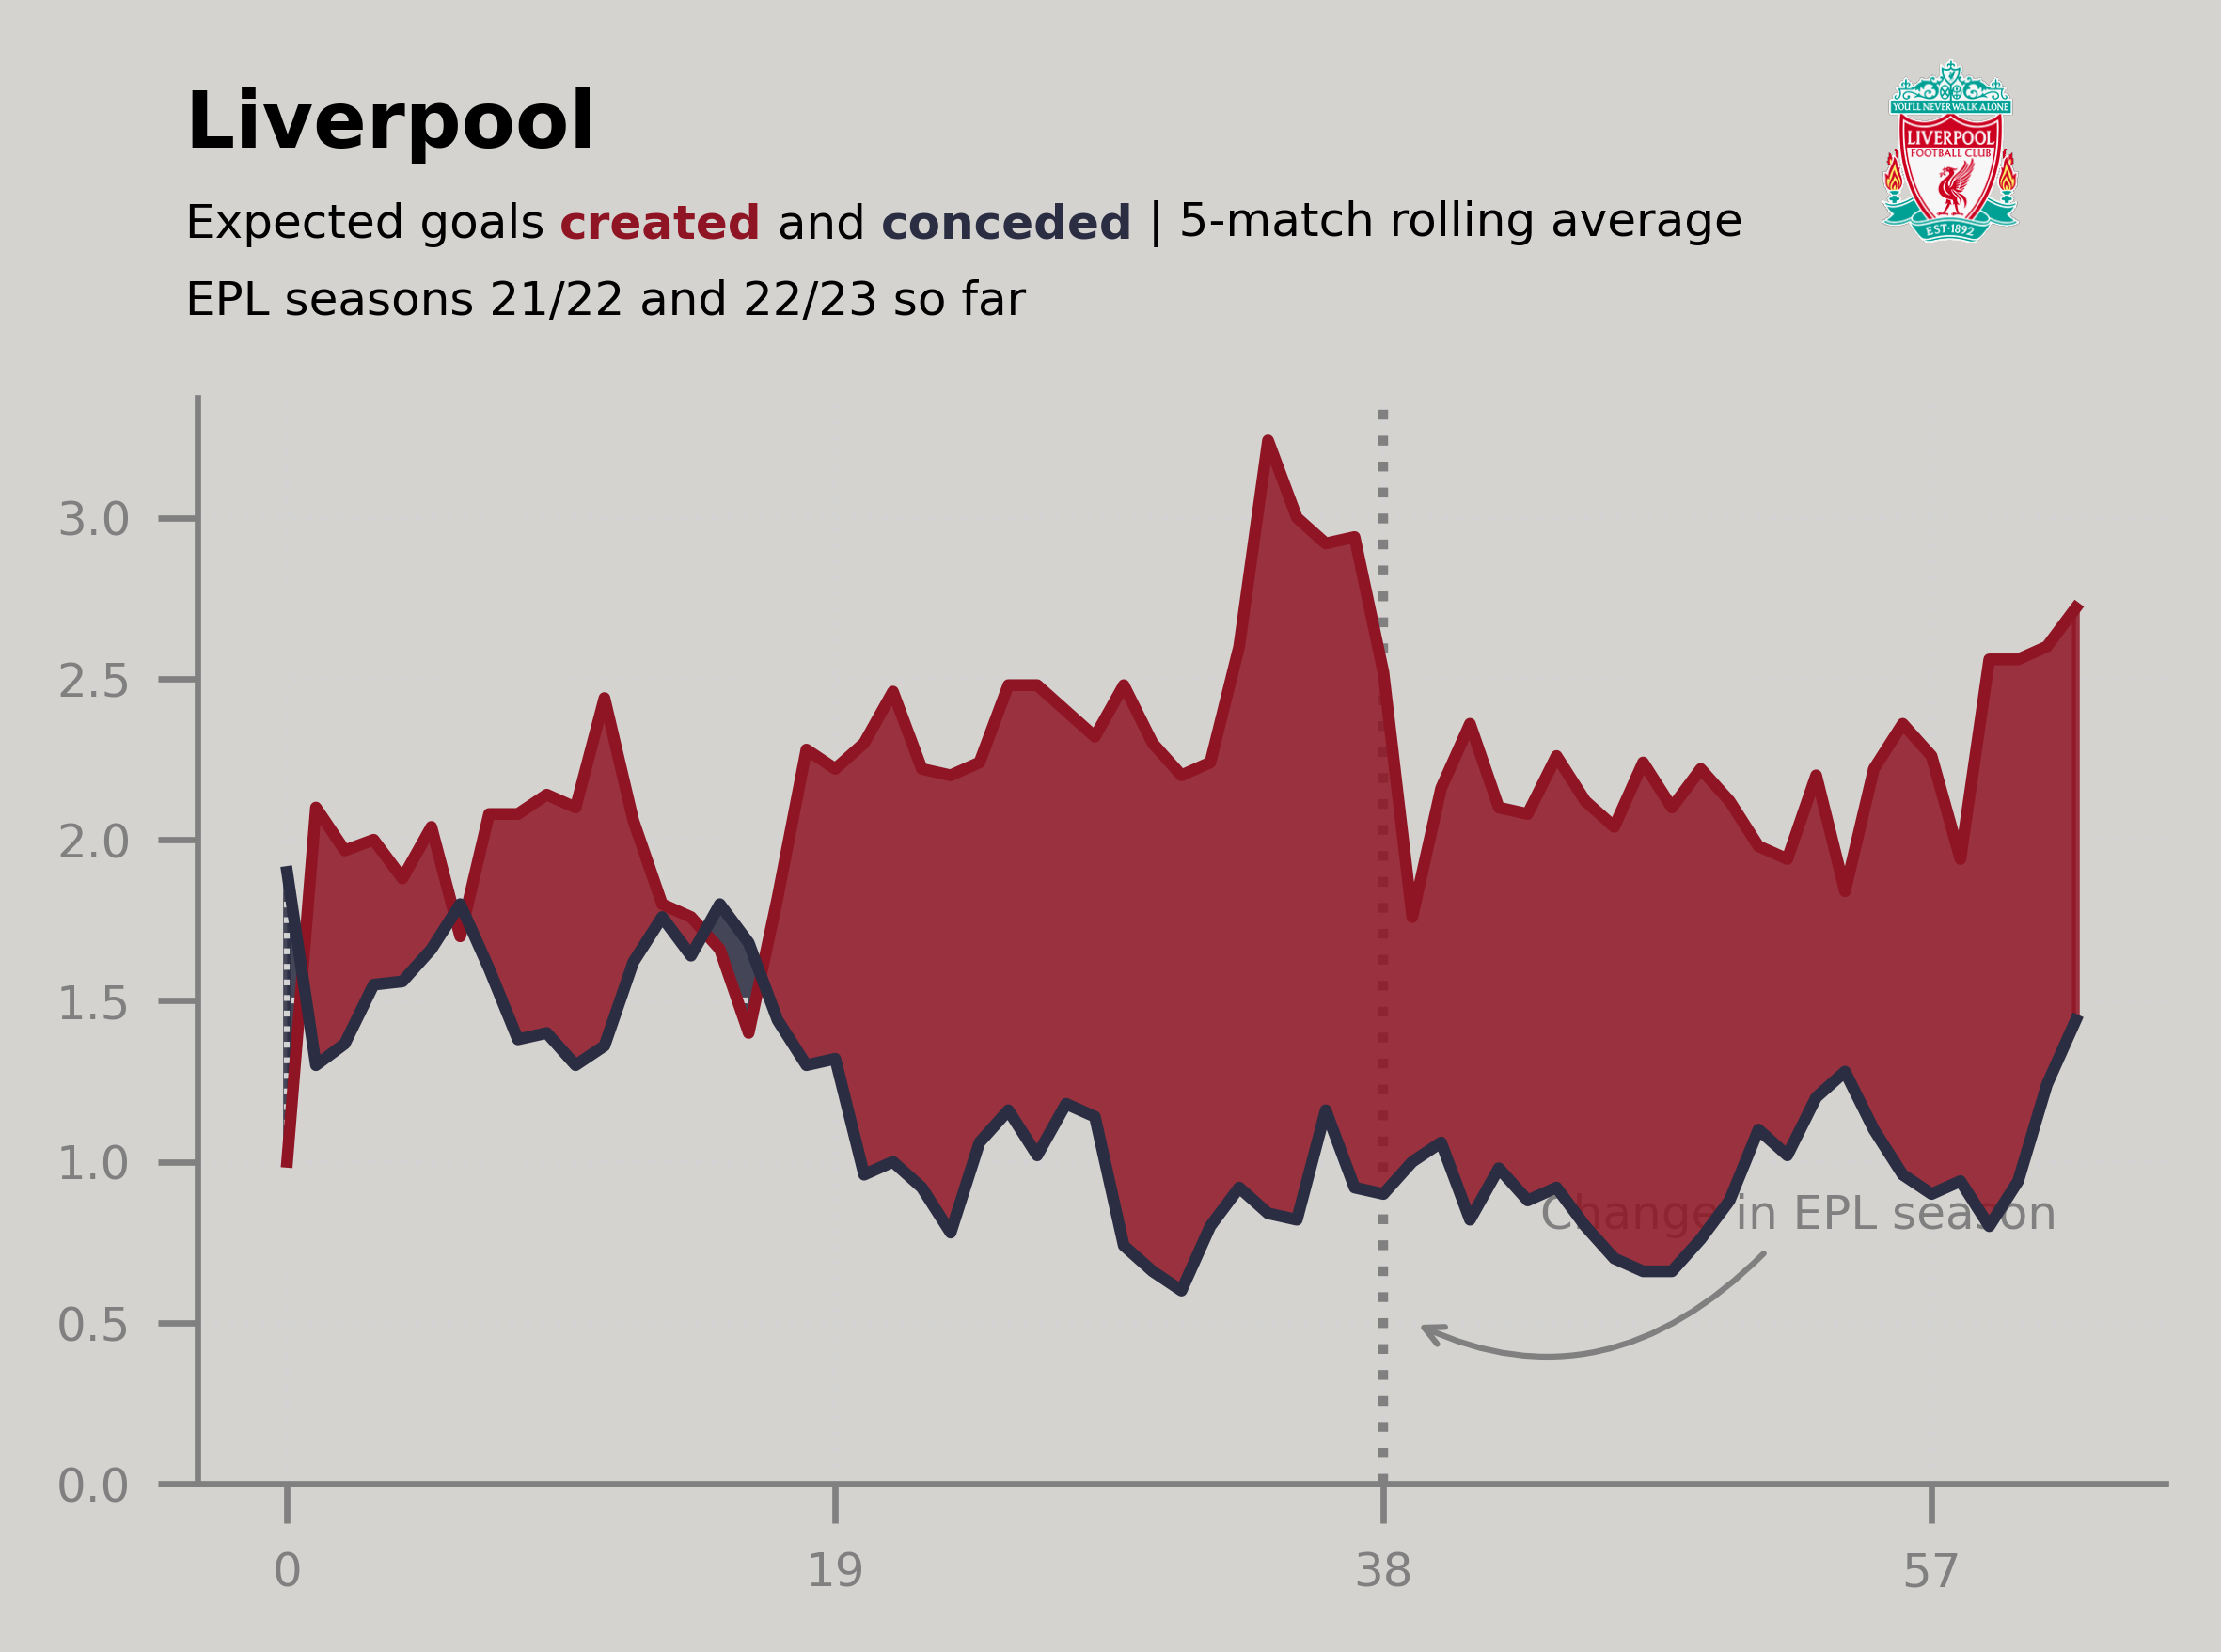

In [26]:
fig = plt.figure(figsize=(4.5, 2.5), dpi = 600, facecolor = "#D5D3D0")
ax = plt.subplot(111, facecolor = "#D5D3D0")

# Remove top & right spines and change the color.
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")

# Set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

line_1 = ax.plot(X, Y_for, color = "#901524", zorder = 4)
line_2 = ax.plot(X, Y_ag, color = "#2B2D42", zorder = 4)

ax.set_ylim(0)
# Add a line to mark the division between seasons
ax.plot(
    [38,38], # 38 games per season
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    ls = ":",
    lw = 1.25,
    color = "grey",
    zorder = 2
)

# Annotation with data coordinates and offset points.
ax.annotate(
    xy = (38, .55),
    xytext = (20, 10),
    textcoords = "offset points",
    text = "Change in EPL season",
    size = 6,
    color = "grey",
    arrowprops=dict(
        arrowstyle="->", shrinkA=0, shrinkB=5, color="grey", linewidth=0.75,
        connectionstyle="angle3,angleA=50,angleB=-30"
    ) # Arrow to connect annotation
)

# Fill between
ax.fill_between(
    X, 
    Y_ag["value"],
    Y_for["value"], 
    where = Y_for["value"] >= Y_ag["value"], 
    interpolate = True,
    alpha = 0.85,
    zorder = 3,
    color = line_1[0].get_color()
)

ax.fill_between(
    X, 
    Y_ag["value"],
    Y_for["value"], 
    where = Y_ag["value"] > Y_for["value"], 
    interpolate = True,
    alpha = 0.85,
    color = line_2[0].get_color()
)

# Customize the ticks to match spine color and adjust label size.
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "grey",
    zorder = 3
)

# Set x-axis major tick positions to only 19 game multiples.
ax.xaxis.set_major_locator(ticker.MultipleLocator(19))
# Set y-axis major tick positions to only 0.5 xG multiples.
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

# Title and subtitle for the legend
fig_text(
    x = 0.12, y = 1.1,
    s = "Liverpool ",
    color = "black",
    weight = "bold",
    size = 10,
    family = "DM Sans", #This is a custom font !!
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 1.02,
    s = "Expected goals <created> and <conceded> | 5-match rolling average\nEPL seasons 21/22 and 22/23 so far",
    highlight_textprops = [
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2[0].get_color(), "weight": "bold"}
    ],
    color = "black",
    size = 6,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

logo_ax = fig.add_axes([0.75, .99, 0.13, 0.13], zorder=1)
club_icon = Image.open("data/8650.png")
logo_ax.imshow(club_icon)
logo_ax.axis("off")
plt.savefig(
    "figure/Liverpool_rolling_xg01_02_23.png",
    dpi = 600,
    facecolor = "#e2ece9",
    bbox_inches="tight",
    edgecolor="none",
    transparent = False
)